In [1]:
import matplotlib

import matplotlib.pyplot as plt
import DDFS.kalman_method as km
from DDFS.element import *
from copy import deepcopy
from tqdm.notebook import tqdm
%matplotlib inline
np.set_printoptions(precision=4, suppress=True)



Detector fast Design & Test package is initialized.


### Assume that you have done 2&3, then it should produced two folder: a_test, k_test

Please input the test number When create a Result object. or load the data from file.
analytic
[  3.1919   4.3838   5.5758   6.7677   7.9596   9.1515  10.3434  11.5354
  12.7273  13.9192  15.1111  16.303   17.4949  18.6869  19.8788  21.0707
  22.2626  23.4545  24.6465  25.8384  27.0303  28.2222  29.4141  30.6061
  31.798   32.9899  34.1818  35.3737  36.5657  37.7576  38.9495  40.1414
  41.3333  42.5253  43.7172  44.9091  46.101   47.2929  48.4848  49.6768
  50.8687  52.0606  53.2525  54.4444  55.6364  56.8283  58.0202  59.2121
  60.404   61.596   62.7879  63.9798  65.1717  66.3636  67.5556  68.7475
  69.9394  71.1313  72.3232  73.5152  74.7071  75.899   77.0909  78.2828
  79.4747  80.6667  81.8586  83.0505  84.2424  85.4343  86.6263  87.8182
  89.0101  90.202   91.3939  92.5859  93.7778  94.9697  96.1616  97.3535
  98.5455  99.7374 100.9293 102.1212 103.3131 104.5051 105.697  106.8889
 108.0808 109.2727 110.4646 111.6566 112.8485 114.0404 115.2323 116.4242
 117.6162 118.8081 120.      

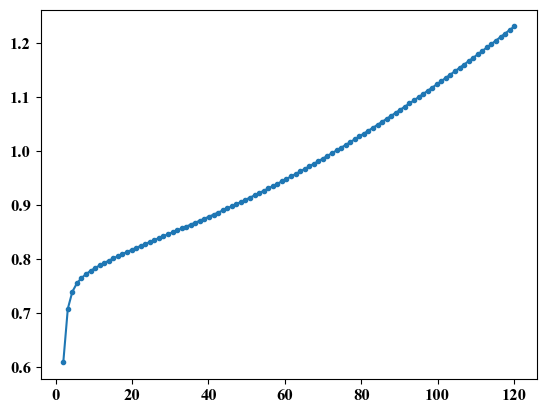

In [19]:
########## analytic info #################

re_a = Result()
re_a.load_root("a_test\\a_test.root")



##### you can get initial, result by .get() function

p_list = re_a.get("p")
dp_list = re_a.get("dp")
print(p_list)


## The data might be in incorrect order,add a sort help
sorted = np.argsort(p_list)
p_list = p_list[sorted]
dp_list = dp_list[sorted]

plt.plot(p_list, dp_list, '.-')


Please input the test number When create a Result object. or load the data from file.
kalman


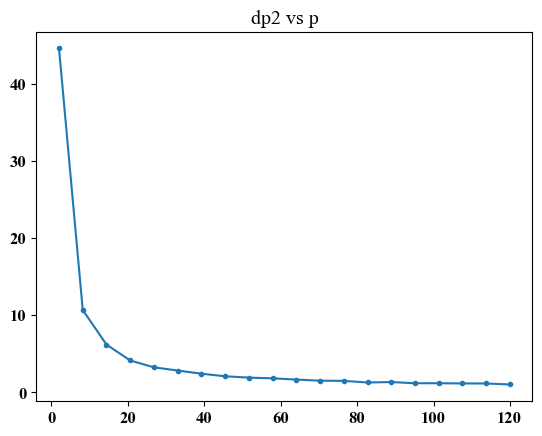

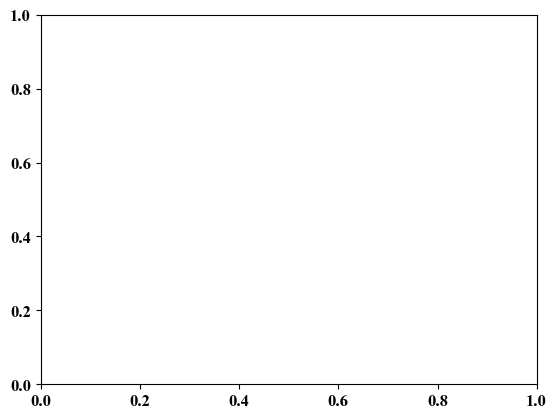

In [28]:
########## kalman info #################

re_k = Result()
re_k.load_root("k_test\\k_test.root")



##### you can get initial, result by .get() function

p_list = re_k.post_initial["p"]
dp_list = re_k.post_result["backward_dp2"]
# print(dp_list)


## The data might be in incorrect order,add a sort help
sorted = np.argsort(p_list)
p_list = p_list[sorted]
dp_list = dp_list[sorted]

plt.plot(p_list, dp_list[:, 1], '.-')
plt.title("dp2 vs p")


## Also compare to origin plot
plt.figure()
re_k.kalman_plot("p", "dp", filter = "backward", emit_mode=re_k.emit_mode)
plt.show()
